In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
properties = pd.read_csv('../data/Propiedades-0701.csv')

In [ ]:
properties.sample(15)

In [ ]:
properties.info()

In [ ]:
properties.describe()

In [ ]:
print(len(properties))

In [ ]:
properties = properties.loc[:,['state_name','place_name','property_type','price','price_aprox_local_currency',\
                               'price_aprox_usd','surface_total_in_m2',\
                               'surface_covered_in_m2',\
                               'price_usd_per_m2','price_per_m2']]

In [ ]:
properties.info()

In [ ]:
# Clean NAs if all the row is null
properties_clean = properties.dropna(how='all') 


In [ ]:
properties_clean.sample(10)

In [ ]:
# Clean NAs if something  has relation with price 
properties = properties_clean.dropna(how='all',subset=
                                ['property_type','price','price_aprox_local_currency',\
                               'price_aprox_usd','surface_total_in_m2',\
                               'surface_covered_in_m2',\
                               'price_usd_per_m2','price_per_m2'])

In [ ]:
properties.info()

In [ ]:
prop_cap_fed = properties.loc[properties.state_name.str.contains('Capital Federal'),:]

In [ ]:
prop_cap_fed.head()

In [ ]:
# clean m2 Nan
pcf = prop_cap_fed.dropna(how='all',subset=['price_aprox_usd'])

# Mean m2 in Cap fed.
grouped = pcf.loc[:,['place_name','price_usd_per_m2']]\
            .groupby('place_name')\
            .agg([np.mean,np.size])
           
top20 = grouped.loc[grouped[('price_usd_per_m2','size')]>100,:]\
               .sort_values(('price_usd_per_m2','mean'), ascending=False).head(20)
# top 5    
top20.head(20)        

In [ ]:
# clean m2 Nan
pcf_prop_type = prop_cap_fed.dropna(how='all',subset=['price_aprox_usd'])

# Mean m2 in Cap fed per property type
grouped = pcf_prop_type .loc[:,['place_name','property_type','price_usd_per_m2']]\
            .groupby(['place_name','property_type'])\
            .agg([np.mean,np.size])
               
top20 = grouped.loc[grouped[('price_usd_per_m2','size')]>20,:]\
               .sort_values(('price_usd_per_m2','mean'), ascending=False).head(20)
# top 5  for each group fo property type  
top20.head() 

In [ ]:
# clean m2 Nan
pcf_house = prop_cap_fed.dropna(how='all',subset=['price_aprox_usd'])

# Mean m2 in Cap fed.
grouped = pcf_house.loc[(pcf_house.property_type =='house'),:]\
            .loc[:,['place_name','price_usd_per_m2']]\
            .groupby('place_name')\
            .agg([np.mean,np.size])
           
top20 = grouped.loc[grouped[('price_usd_per_m2','size')]>10,:]\
               .sort_values(('price_usd_per_m2','mean'), ascending=False).head(20)
# top 20  m2 per house  
top20.head(20)   

In [ ]:
# clean m2 Nan
pcf_house = prop_cap_fed.dropna(how='all',subset=['price_aprox_usd'])

# Mean m2 in Cap fed.
grouped = pcf_house.loc[(pcf_house.property_type =='apartment'),:]\
            .loc[:,['place_name','price_usd_per_m2']]\
            .groupby('place_name')\
            .agg([np.mean,np.size])
           
top20 = grouped.loc[grouped[('price_usd_per_m2','size')]>100,:]\
               .sort_values(('price_usd_per_m2','mean'), ascending=False).head(20)
# top 20  m2 per apartment
top20.head(20) 

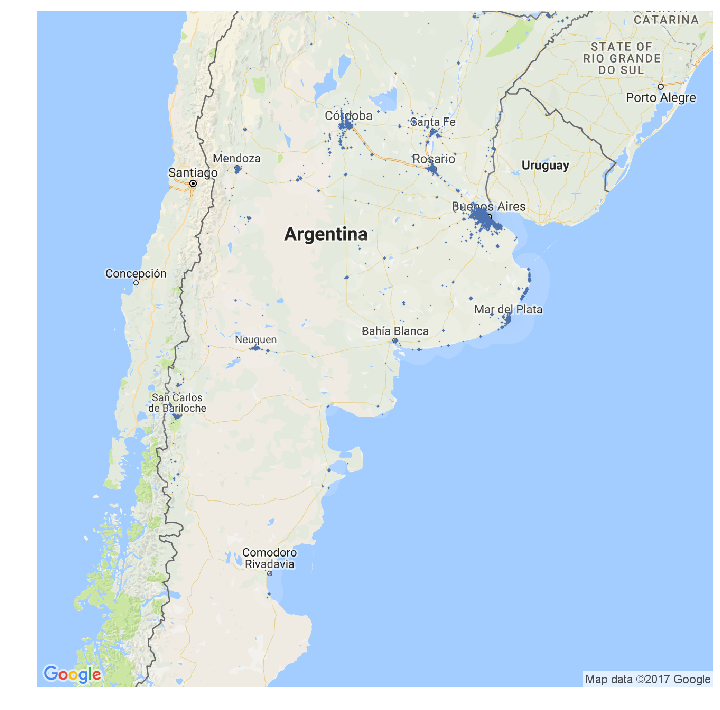

In [3]:
#google maps
import requests
import gmaps as gm
prop_maps= properties.loc[:,['lat','lon']]
prop_maps = prop_maps.dropna(how='any')

gm.density_plot(prop_maps['lat'], prop_maps['lon'])

In [ ]:
prop_maps.info()

In [ ]:
# proxima tarea: 
# comparar tipos de ambientes, hay zonas donde el m2 es mas caro
# pero se caracteriza por vender un tipo de ambientes determinado.
# ...